In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [2]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [69]:
!pwd
write_dir = home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [70]:
all_obs_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')

In [71]:
all_obs_data.head(10)

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,ID,b_t0,b_t1,r_t1,...,epoch_trial_zero_idx,epoch_trial_one_idx,shifted_epoch_trial_zero_idx,repeat_trial,prop_112,n_epoch_trials,p_id_solution,obs_low_val_cue,id_choice,p_id_accuracy
0,0.099471,0.000000,0.000000,1,0.013572,0.416406,761,0.000000,0.000000,2.528877,...,0,1,0,1,0.305556,36,111,111,111,1
1,0.035079,0.000000,0.000000,0,0.013572,0.599471,761,1.390214,0.149207,0.000000,...,1,2,1,2,0.305556,36,111,112,112,0
2,0.023075,-1.241007,1.241007,0,0.013572,0.535079,761,0.792372,0.196591,0.000000,...,2,3,2,3,0.305556,36,111,112,111,1
3,0.019881,-0.595781,0.595781,0,-1.000000,0.523075,761,0.532802,0.226667,0.000000,...,3,4,3,4,0.305556,36,111,112,112,0
4,0.018539,-0.306135,0.306135,0,-1.000000,0.519881,761,0.391376,0.251982,0.000000,...,4,5,4,5,0.305556,36,111,112,111,1
5,0.268538,-0.139394,0.139394,0,-1.000000,0.518539,761,0.302804,0.275119,3.036967,...,5,6,5,6,0.305556,36,111,111,111,1
6,0.035630,-0.027685,0.027685,0,-1.000000,0.768538,761,1.408409,0.604046,0.000000,...,6,7,6,7,0.305556,36,111,112,111,1
7,0.785155,-0.804363,0.804363,0,-1.000000,0.535630,761,0.571150,0.635969,4.661588,...,7,8,7,8,0.305556,36,111,111,111,1
8,0.352873,0.064818,-0.064818,0,-1.000000,1.285155,761,4.114561,1.314367,-0.099227,...,8,9,8,9,0.305556,36,111,111,111,1
9,0.206726,-2.800194,2.800194,0,-0.935182,0.852873,761,0.822059,1.379872,4.103838,...,9,10,9,10,0.305556,36,111,111,112,0


In [72]:
all_obs_data.columns = all_obs_data.columns.str.strip()
all_obs_data.head()

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,ID,b_t0,b_t1,r_t1,...,epoch_trial_zero_idx,epoch_trial_one_idx,shifted_epoch_trial_zero_idx,repeat_trial,prop_112,n_epoch_trials,p_id_solution,obs_low_val_cue,id_choice,p_id_accuracy
0,0.099471,0.000000,0.000000,1,0.013572,0.416406,761,0.000000,0.000000,2.528877,...,0,1,0,1,0.305556,36,111,111,111,1
1,0.035079,0.000000,0.000000,0,0.013572,0.599471,761,1.390214,0.149207,0.000000,...,1,2,1,2,0.305556,36,111,112,112,0
2,0.023075,-1.241007,1.241007,0,0.013572,0.535079,761,0.792372,0.196591,0.000000,...,2,3,2,3,0.305556,36,111,112,111,1
3,0.019881,-0.595781,0.595781,0,-1.000000,0.523075,761,0.532802,0.226667,0.000000,...,3,4,3,4,0.305556,36,111,112,112,0
4,0.018539,-0.306135,0.306135,0,-1.000000,0.519881,761,0.391376,0.251982,0.000000,...,4,5,4,5,0.305556,36,111,112,111,1


In [73]:
all_obs_data.columns

Index(['cpp', 'target_B', 'choice_B', 'cp', 'gen_drift', 'gen_bound', 'ID',
       'b_t0', 'b_t1', 'r_t1', 'r_t2', 'obs_cp', 'ideal_B', 'B_ideal_target',
       'B_nonideal_target', 'LR_choice', 'obs_LR_accuracy', 'obs_LR_solution',
       'reward', 'cumulative_reward', 'rt', 'total_trial_time', 'iti',
       'cp_with_slow_fast', 'obs_cp_with_slow_fast', 'obs_high_val_cue',
       'ID.1', 'condition', 'coded_condition', 'original_trial', 'epoch_n',
       'epoch_trial', 'shifted_epoch_trial', 'max_epoch_n',
       'epoch_trial_zero_idx', 'epoch_trial_one_idx',
       'shifted_epoch_trial_zero_idx', 'repeat_trial', 'prop_112',
       'n_epoch_trials', 'p_id_solution', 'obs_low_val_cue', 'id_choice',
       'p_id_accuracy'],
      dtype='object')

In [74]:
# plt.figure(figsize=(50,30))
# sns.barplot(x="condition",y="cp_with_slow_fast", data=test_data, ci=95, n_boot=1000)
# plt.ylabel('n change points')

# plt.figure(figsize=(50,30))
# sns.barplot(x="condition",y="p_id_accuracy", data=test_data, ci=95, n_boot=1000)
# plt.ylabel('accuracy')

# plt.figure(figsize=(50,30))
# sns.barplot(x="condition",y="cumulative_reward", data=test_data, ci=95, n_boot=1000)
# plt.ylabel('cumulative_reward')

In [9]:
# plt.figure(figsize=(50,30))
# sns.barplot(x="condition",y="cpp", data=all_obs_data, ci=95, n_boot=1000)
# plt.ylabel('$\Omega$')

In [10]:
np.unique(all_obs_data.id_choice)

array([111, 112])

In [75]:
all_obs_data.loc[all_obs_data.id_choice == 111, 'id_choice'] = 0
all_obs_data.loc[all_obs_data.id_choice == 112, 'id_choice'] = 1

In [76]:
all_obs_data.loc[all_obs_data.p_id_solution == 111, 'p_id_solution'] = 0
all_obs_data.loc[all_obs_data.p_id_solution == 112, 'p_id_solution'] = 1

In [13]:
# all_obs_data_sample_lv = all_obs_data[(all_obs_data.condition == 'lv') & (all_obs_data.ID == 765)] 
# all_obs_data_sample_hv = all_obs_data[(all_obs_data.condition == 'hv') & (all_obs_data.ID == 765)] 

In [53]:
# np.sum(((all_obs_data.id_choice == all_obs_data.p_id_solution) == 
# all_obs_data.p_id_accuracy))

In [15]:
# plt.figure(figsize=(50,30))
# plt.plot(all_obs_data_sample_lv.target_B, 'b', label='$B$')
# plt.plot(all_obs_data_sample_lv.p_id_accuracy, 'r', label='accuracy')
# plt.plot(all_obs_data_sample_lv.id_choice, 'k', label='choice',)

In [16]:
# plt.figure(figsize=(50,30))
# plt.plot(all_obs_data_sample_hv.target_B, 'r', label='$B$')
# plt.plot(all_obs_data_sample_hv.id_choice, 'k', label='choice')

In [17]:
# plt.figure(figsize=(50,30))
# plt.plot(all_obs_data_sample_lv.cpp, 'r', label='$\Omega$')
# # plt.plot(all_obs_data_sample_lv.id_choice, 'k--', label='id_choice')
# plt.plot(all_obs_data_sample_lv.p_id_solution, 'g--', label='correct_choice')
# plt.legend()

In [18]:
# all_obs_data_sample_lc = all_obs_data[(all_obs_data.condition == 'lc') & (all_obs_data.ID == 761)] 

In [19]:
# #use a low conflict sample to test direction
# plt.figure(figsize=(50,30))
# plt.plot(all_obs_data_sample_lc.target_B, 'r', label='$B_{A} - B_{B}$')
# plt.plot(all_obs_data_sample_lc.id_choice, 'k--', label='id_choice')
# plt.plot(all_obs_data_sample_lc.p_id_solution, 'g--', label='correct_choice')
# plt.legend()

In [20]:
# plt.figure(figsize=(50,30))
# plt.plot(all_obs_data_sample_lc.cpp[0:600], 'k', label='cpp')
# plt.plot(all_obs_data_sample_lc.cp[0:600], 'r--', alpha=0.5, label='true cp')
# plt.ylabel('$\Omega$')
# plt.legend(frameon=1,loc='upper left')

In [77]:
#use target choice as response 
#include correct target choice as stimulus 
all_obs_data = all_obs_data.rename(index=str, columns={"id_choice": "response", 
                                                       "p_id_solution": "stimulus",
                                                        "ID": "subj_idx"})
all_obs_data = all_obs_data[['response', 'stimulus', 'rt', 'condition', 'subj_idx', 'target_B', 'cpp']] 
# #use target-based belief in reward difference (b_t0 - b_t1)
all_obs_data = all_obs_data.rename(index=str, columns={'target_B': 'B'})
# all_obs_data = all_obs_data[(all_obs_data.rt<0.6)]
# all_obs_data.reset_index(drop=True, inplace=True)

In [78]:
all_obs_data.head()

,response,stimulus,rt,condition,subj_idx,B,cpp
0,0,0,0.711570,hc,761,0.000000,0.099471
1,1,0,0.681410,hc,761,0.000000,0.035079
2,0,0,0.767118,hc,761,-1.241007,0.023075
3,1,0,0.507209,hc,761,-0.595781,0.019881
4,0,0,0.656259,hc,761,-0.306135,0.018539


In [79]:
all_obs_data['condition'] = all_obs_data['condition'].str.strip()
all_obs_data.head()

,response,stimulus,rt,condition,subj_idx,B,cpp
0,0,0,0.711570,hc,761,0.000000,0.099471
1,1,0,0.681410,hc,761,0.000000,0.035079
2,0,0,0.767118,hc,761,-1.241007,0.023075
3,1,0,0.507209,hc,761,-0.595781,0.019881
4,0,0,0.656259,hc,761,-0.306135,0.018539


In [80]:
def z_link_func(x, data=all_obs_data):
    stim = (np.asarray(dmatrix('0 + C(s, [[1], [-1]])',
                               {'s': data.stimulus.ix[x.index]}))
    )
    return 1 / (1 + np.exp(-(x * stim)))

In [91]:
def v_link_func_orig(x, data=all_obs_data):
    stim = (np.asarray(dmatrix('0 + C(s,[[1],[-1]])', {'s':data.stimulus.ix[x.index]})))
    return x * stim

In [101]:
def v_link_func(x, data=all_obs_data):
    print(data.stimulus.ix[x.index], data.response.ix[x.index])
#     if data.stimulus.ix[x.index] == data.response.ix[x.index]:
#         x=abs(x)
#     elif data.stimulus.ix[x.index] != data.response.ix[x.index]:
#         x=-1*x
    return x 

In [82]:
np.unique(all_obs_data.subj_idx), np.unique(all_obs_data.condition)

(array([761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773,
        774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object))

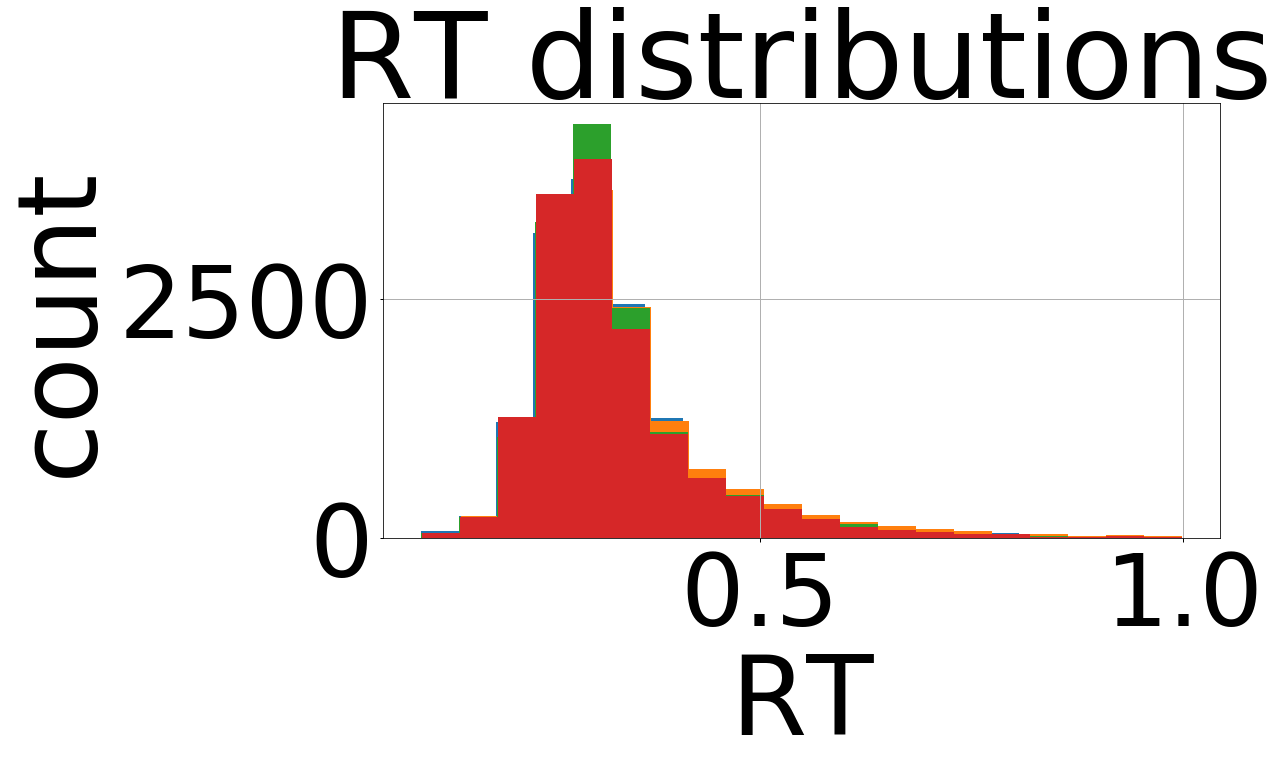

In [27]:
fig=plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_obs_data.groupby('condition'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [28]:
# plt.figure(figsize=(50,30))
# plt.plot(all_obs_data.B[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
# plt.ylabel('B')

In [ ]:
# plt.figure(figsize=(15,8))
# plt.plot(all_obs_data.response[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
# plt.plot(all_obs_data.B[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'r')

# plt.ylabel('stimulus selected')

Text(0,0.5,'stimulus selected')

In [27]:
all_obs_data.columns

Index(['response', 'stimulus', 'rt', 'condition', 'subj_idx', 'B', 'cpp'], dtype='object')

In [ ]:
# fig=plt.figure(figsize=(15,8))
# plt.plot(all_obs_data.stimulus[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
# plt.ylabel('correct stimulus')

Text(0,0.5,'correct stimulus')

In [83]:
n_samples, n_burned_samples = 1000,50
n_samples_test, n_burned_samples_test, n_thin_test = 10, 2, 2

In [29]:
#get all permutations of a,t,v
#hold position of learning signals constant to get all combinations 
#of learning signal and parameter pairs 
from itertools import permutations
from more_itertools import chunked

targets = ['a~', 't~', 'v~', 'z~']
signals = (('cpp:C(condition)', 'B:C(condition)'),)
param_pairs = list(permutations(targets, 2))
learning_signal_pairs = signals*(int(len(param_pairs)/len(signals)))

print(learning_signal_pairs)
print(param_pairs)

(('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'))
[('a~', 't~'), ('a~', 'v~'), ('a~', 'z~'), ('t~', 'a~'), ('t~', 'v~'), ('t~', 'z~'), ('v~', 'a~'), ('v~', 't~'), ('v~', 'z~'), ('z~', 'a~'), ('z~', 't~'), ('z~', 'v~')]


In [30]:
tuple_idx = np.repeat(list(np.arange(len(learning_signal_pairs))),2)
tuple_element_idx = [0,1]*len(learning_signal_pairs)
models = [param_pairs[t_idx][e_idx] + learning_signal_pairs[t_idx][e_idx] for t_idx,e_idx in zip(tuple_idx, tuple_element_idx)]

In [31]:
reg_descriptions = list(chunked(models,2))
print(reg_descriptions)

model_dict = {'a_cpp_t_B': reg_descriptions[0], 'a_cpp_v_B': reg_descriptions[1],
'a_cpp_z_B': reg_descriptions[2], 't_cpp_a_B': reg_descriptions[3], 
't_cpp_v_B': reg_descriptions[4], 't_cpp_z_B': reg_descriptions[5], 
              'v_cpp_a_B': reg_descriptions[6], 'v_cpp_t_B': reg_descriptions[7],
             'v_cpp_z_B': reg_descriptions[8], 'z_cpp_a_B': reg_descriptions[9],
             'z_cpp_t_B': reg_descriptions[10], 'z_cpp_v_B': reg_descriptions[11]}

[['a~cpp:C(condition)', 't~B:C(condition)'], ['a~cpp:C(condition)', 'v~B:C(condition)'], ['a~cpp:C(condition)', 'z~B:C(condition)'], ['t~cpp:C(condition)', 'a~B:C(condition)'], ['t~cpp:C(condition)', 'v~B:C(condition)'], ['t~cpp:C(condition)', 'z~B:C(condition)'], ['v~cpp:C(condition)', 'a~B:C(condition)'], ['v~cpp:C(condition)', 't~B:C(condition)'], ['v~cpp:C(condition)', 'z~B:C(condition)'], ['z~cpp:C(condition)', 'a~B:C(condition)'], ['z~cpp:C(condition)', 't~B:C(condition)'], ['z~cpp:C(condition)', 'v~B:C(condition)']]


In [32]:
print(model_dict)

{'t_cpp_v_B': ['t~cpp:C(condition)', 'v~B:C(condition)'], 'z_cpp_a_B': ['z~cpp:C(condition)', 'a~B:C(condition)'], 'v_cpp_z_B': ['v~cpp:C(condition)', 'z~B:C(condition)'], 'a_cpp_v_B': ['a~cpp:C(condition)', 'v~B:C(condition)'], 'z_cpp_t_B': ['z~cpp:C(condition)', 't~B:C(condition)'], 'z_cpp_v_B': ['z~cpp:C(condition)', 'v~B:C(condition)'], 'v_cpp_a_B': ['v~cpp:C(condition)', 'a~B:C(condition)'], 'a_cpp_z_B': ['a~cpp:C(condition)', 'z~B:C(condition)'], 'a_cpp_t_B': ['a~cpp:C(condition)', 't~B:C(condition)'], 'v_cpp_t_B': ['v~cpp:C(condition)', 't~B:C(condition)'], 't_cpp_a_B': ['t~cpp:C(condition)', 'a~B:C(condition)'], 't_cpp_z_B': ['t~cpp:C(condition)', 'z~B:C(condition)']}


In [33]:
model_dict['t_cpp_v_B']

['t~cpp:C(condition)', 'v~B:C(condition)']

In [108]:
v_reg = {'model': 'v ~ 1 + B:C(condition)', 'link_func': v_link_func_orig}
t_reg = {'model': 't ~ 1 + cpp:C(condition)', 'link_func': lambda x:x}
reg_descr = [v_reg, t_reg]

In [42]:
level1a = {'v':.3, 'a':2, 't':.3, 'sv':0, 'z':.5, 'sz':0, 'st':0}
level2a = {'v':.4, 'a':2, 't':.3, 'sv':0, 'z':.6, 'sz':0, 'st':0}
level3a = {'v':.5, 'a':2, 't':.3, 'sv':0, 'z':.7, 'sz':0, 'st':0}
trials_per_level=200
n_subjects=1

In [43]:
data_a, params_a = hddm.generate.gen_rand_data({'level1': level1a,
                                                'level2': level2a,
                                                'level3': level3a},
                                                size=trials_per_level,
                                                subjs=n_subjects)

In [104]:
?hddm.HDDMStimCoding

In [109]:
t_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data, reg_descr, bias=True, group_only_regressors=True, informative=False)
# t_cpp_v_B_obs_reg.find_starting_values()
t_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_test_link.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']
Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 61042.5 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [94]:
 t_cpp_v_B_obs_reg.print_stats()

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                              mean          std        2.5q          25q         50q         75q      97.5q       mc err
a                          1.02257    0.0178087    0.987931      1.01055     1.02283     1.03478    1.05706   0.00067467
a_std                    0.0884693    0.0142027   0.0659961     0.079129   0.0870037    0.095701    0.12207  0.000570935
a_subj.761                0.929644    0.0100662    0.909619     0.923214    0.929577    0.936513   0.948993  0.000417601
a_subj.762                 1.01152   0.00953081    0.993159       1.0047     1.01131     1.01815    1.03056  0.000381819
a_subj.763                 1.04946   0.00980891     1.03021      1.04265     1.04953     1.05607    1.06825  0.000362994
a_subj.764                 1.00902    0.0095388    0.990417      1.00279     1.00948     1.01533    1.02704   0.00031632
a_subj.765                 1.17663    0.0116839     1.15393      1.16911     1.17639     1.18461    1.20007  0.000410179
a_subj.766                 1.015

In [ ]:
a_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['a_cpp_t_B'], bias=True, group_only_regressors=True)
# a_cpp_t_B_obs_reg.find_starting_values()
a_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='a_cpp_t_B_obs_reg.db', db='pickle')

In [ ]:
a_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['a_cpp_v_B'], bias=True, group_only_regressors=True )
# a_cpp_v_B_obs_reg.find_starting_values()
a_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='a_cpp_v_B_obs_reg.db', db='pickle')

In [ ]:
t_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['t_cpp_a_B'], bias=True, group_only_regressors=True )
# t_cpp_a_B_obs_reg.find_starting_values()
t_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_a_B_obs_reg.db', db='pickle')

In [ ]:
t_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['t_cpp_v_B'], bias=True, group_only_regressors=True )
# t_cpp_v_B_obs_reg.find_starting_values()
t_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg.db', db='pickle')

In [ ]:
v_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['v_cpp_a_B'], bias=True, group_only_regressors=True )
# v_cpp_a_B_obs_reg.find_starting_values()
v_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='v_cpp_a_B_obs_reg.db', db='pickle')

In [ ]:
v_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['v_cpp_t_B'], bias=True, group_only_regressors=True )
# v_cpp_t_B_obs_reg.find_starting_values()
v_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='v_cpp_t_B_obs_reg.db', db='pickle')

# All $z$ models 

In [ ]:
z_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data, model_dict['z_cpp_a_B'], 
                                      bias=True, group_only_regressors=True)
# z_cpp_a_B_obs_reg.find_starting_values()
z_cpp_a_B_obs_reg.sample(n_samples, burn=n_burned_samples,   dbname='z_cpp_a_B_obs_reg.db', db='pickle')

In [ ]:
z_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['z_cpp_v_B'], bias=True, group_only_regressors=True)
# z_cpp_v_B_obs_reg.find_starting_values()
z_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='z_cpp_v_B_obs_reg.db', db='pickle')

In [ ]:
z_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,  model_dict['z_cpp_t_B'], bias=True,
                                    group_only_regressors=True)
# z_cpp_t_B_obs_reg.find_starting_values()
z_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='z_cpp_t_B_obs_reg.db', db='pickle')

In [ ]:
a_cpp_z_B_obs_reg = hddm.HDDMRegressor(all_obs_data, model_dict['a_cpp_z_B'], bias=True,
                                      group_only_regressors=True)
# a_cpp_z_B_obs_reg.find_starting_values()
a_cpp_z_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='a_cpp_z_B_obs_reg.db', db='pickle')

In [ ]:
v_cpp_z_B_obs_reg = hddm.HDDMRegressor(all_obs_data, model_dict['v_cpp_z_B'], bias=True, 
                                      group_only_regressors=True)
# v_cpp_z_B_obs_reg.find_starting_values()
v_cpp_z_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='v_cpp_z_B_obs_reg.db', db='pickle')

In [ ]:
t_cpp_z_B_obs_reg = hddm.HDDMRegressor(all_obs_data, model_dict['t_cpp_z_B'], bias=True,
                                      group_only_regressors=True)
# t_cpp_z_B_obs_reg.find_starting_values()
t_cpp_z_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_z_B_obs_reg.db', db='pickle')

In [ ]:
a_cpp_t_B_obs_reg=hddm.load(write_dir+'a_cpp_t_B_obs_reg')
a_cpp_v_B_obs_reg=hddm.load(write_dir+'a_cpp_v_B_obs_reg')
t_cpp_a_B_obs_reg=hddm.load(write_dir+'t_cpp_a_B_obs_reg')

t_cpp_v_B_obs_reg=hddm.load(write_dir+'t_cpp_v_B_obs_reg')
v_cpp_a_B_obs_reg=hddm.load(write_dir+'v_cpp_a_B_obs_reg')
v_cpp_t_B_obs_reg=hddm.load(write_dir+'v_cpp_t_B_obs_reg')

In [ ]:
z_cpp_a_B_obs_reg=hddm.load(write_dir+'z_cpp_a_B_obs_reg')
z_cpp_v_B_obs_reg=hddm.load(write_dir+'z_cpp_v_B_obs_reg')
z_cpp_t_B_obs_reg=hddm.load(write_dir+'z_cpp_t_B_obs_reg')

a_cpp_z_B_obs_reg=hddm.load(write_dir+'a_cpp_z_B_obs_reg')
v_cpp_z_B_obs_reg=hddm.load(write_dir+'v_cpp_z_B_obs_reg')
t_cpp_z_B_obs_reg=hddm.load(write_dir+'t_cpp_z_B_obs_reg')

In [ ]:
#send text when the script is done
from twilio.rest import Client
accountSid = 'AC2832bdf83bb5a2f150686d323b7a3440'
authToken = '70363f4f104ac88b8aefc6b7886fb989'
twilioClient = Client(accountSid, authToken)
myTwilioNumber = 6095422252
destCellPhone = 6094242780
myMessage = twilioClient.messages.create(body = "regressions are done for observed data. group only regressors.",
                                         from_=myTwilioNumber, to=destCellPhone)

# Save models 

In [ ]:
t_cpp_v_B_obs_reg.print_stats()

In [ ]:
#save models... many many samples, much time
a_cpp_t_B_obs_reg.save(write_dir+'a_cpp_t_B_obs_reg')
a_cpp_v_B_obs_reg.save(write_dir+'a_cpp_v_B_obs_reg')
t_cpp_a_B_obs_reg.save(write_dir+'t_cpp_a_B_obs_reg')

t_cpp_v_B_obs_reg.save(write_dir+'t_cpp_v_B_obs_reg')
v_cpp_a_B_obs_reg.save(write_dir+'v_cpp_a_B_obs_reg')
v_cpp_t_B_obs_reg.save(write_dir+'v_cpp_t_B_obs_reg')

# #save z models 
z_cpp_a_B_obs_reg.save(write_dir+'z_cpp_a_B_obs_reg')
z_cpp_v_B_obs_reg.save(write_dir+'z_cpp_v_B_obs_reg')
z_cpp_t_B_obs_reg.save(write_dir+'z_cpp_t_B_obs_reg')

a_cpp_z_B_obs_reg.save(write_dir+'a_cpp_z_B_obs_reg')
v_cpp_z_B_obs_reg.save(write_dir+'v_cpp_z_B_obs_reg')
t_cpp_z_B_obs_reg.save(write_dir+'t_cpp_z_B_obs_reg')

# Plot model fits

In [ ]:
z_cpp_a_B_obs_reg.dic, z_cpp_v_B_obs_reg.dic, z_cpp_t_B_obs_reg.dic, a_cpp_z_B_obs_reg.dic, v_cpp_z_B_obs_reg.dic,t_cpp_z_B_obs_reg.dic

In [ ]:
dic = [a_cpp_t_B_obs_reg.dic, a_cpp_v_B_obs_reg.dic,t_cpp_a_B_obs_reg.dic,
        t_cpp_v_B_obs_reg.dic, v_cpp_a_B_obs_reg.dic, v_cpp_t_B_obs_reg.dic]

In [ ]:
dics = [a_cpp_t_B_obs_reg.dic, a_cpp_v_B_obs_reg.dic,t_cpp_a_B_obs_reg.dic,
        t_cpp_v_B_obs_reg.dic, v_cpp_a_B_obs_reg.dic, v_cpp_t_B_obs_reg.dic, 
       z_cpp_a_B_obs_reg.dic, z_cpp_v_B_obs_reg.dic, z_cpp_t_B_obs_reg.dic, 
        a_cpp_z_B_obs_reg.dic, v_cpp_z_B_obs_reg.dic,t_cpp_z_B_obs_reg.dic]
m_names = ['a_cpp & t_B', 'a_cpp & v_B', 't_cpp & a_B', 
            't_cpp & v_B', 'v_cpp & a_B', 'v_cpp & t_B', 
              'z_cpp & a_B', 'z_cpp & v_B', 'z_cpp & t_B',
              'a_cpp & z_B', 'v_cpp & z_B', 't_cpp & z_B']

In [ ]:
winner = np.where(dics == min(dics))[0]
m_names[winner]

In [ ]:
len(dics)

In [ ]:
m_names

In [ ]:
m_names[11]

In [ ]:
dics[11]

In [ ]:
plt.figure(figsize=(50,15))
sns.set(font_scale=3)  

clrs = ["black" if (dic > min(dics)) else 'forestgreen' for dic in dics]
sns.barplot(m_names, dics, color='black', alpha=0.5, palette=clrs)
plt.ylim(min(dics) - 40, max(dics) + 500)
plt.ylabel('Observed DIC score')
# plt.title('All pairwise parameters and learning signals')
plt.savefig('observed_reg_dics.png', dpi=600)

# Plot posteriors of regression coefficients

In [ ]:
#plot posteriors for winning model 
v_hc , v_hv ,  v_lc , v_lv  = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
                                                          'node']


t_hc , t_hv , t_lc , t_lv  = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 
                                                             't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]'],
                                                          'node']

In [ ]:
# #plot posteriors for gen model 
# v_hc_gen , v_hv ,  v_lc_gen , v_lv_gen  = a_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
#                                                              'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
#                                                           'node']


# a_hc_gen , a_hv_gen , a_lc_gen , a_lv_gen  = a_cpp_v_B_obs_reg.nodes_db.ix[['a_cpp:C(condition)[hc]', 'a_cpp:C(condition)[hv]', 
#                                                              'a_cpp:C(condition)[lc]', 'a_cpp:C(condition)[lv]'],
#                                                           'node']

In [ ]:
##generative model
# hddm.analyze.plot_posterior_nodes([v_lc_gen , v_hc_gen  ])
# plt.xlabel('drift-rate regression coefficient')
# plt.ylabel('Posterior probability')
# plt.title('Posteriors of belief-> drift-rate effect')
# # plt.savefig('600a_drifa_conflict.pdf')

# hddm.analyze.plot_posterior_nodes([v_lv_gen  , v_hv_gen  ])
# plt.xlabel('drift-rate regression coefficient')
# plt.ylabel('Posterior probability')
# plt.title('Posteriors of belief-> drift-rate effect')
# # plt.savefig('600a_drifa_vol.pdf')

# hddm.analyze.plot_posterior_nodes([a_lc_gen  , a_hc_gen  ])
# plt.xlabel('non-decision time regression coefficient')
# plt.ylabel('Posterior probability')
# plt.title('Posteriors of cpp-> threshold effect')
# # plt.savefig('600a_bound_conflict.pdf')


# hddm.analyze.plot_posterior_nodes([a_lv_gen  , a_hv_gen  ])
# plt.xlabel('decision threshold regression coefficient')
# plt.ylabel('Posterior probability')
# plt.title('Posteriors of cpp-> threshold effect')
# # plt.savefig('600a_bound_vol.pdf')

In [ ]:
hddm.analyze.plot_posterior_nodes([v_lc , v_hc ])
plt.xlabel('drift-rate regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of belief-> drift-rate effect')
# plt.savefig('600t_drift_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv , v_hv ])
plt.xlabel('drift-rate regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of belief-> drift-rate effect')
# plt.savefig('600t_drift_vol.pdf')

hddm.analyze.plot_posterior_nodes([t_lc , t_hc ])
plt.xlabel('non-decision time regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of cpp-> non-decision time effect')
# plt.savefig('600t_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([t_lv , t_hv ])
plt.xlabel('non-decision time regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of cpp-> non-decision time effect')
# plt.savefig('600t_bound_vol.pdf')

In [ ]:
sns.set(font_scale=4)  # crazy big

plt.figure(figsize=(30,20))
sns.distplot(v_hv.trace(), label=r'$\beta_{hv}$', hist=False,rug=True,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(v_lv.trace(), label=r'$\beta_{lv}$', hist=False,rug=True,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')

plt.xlim([-.05,0.5]) 
plt.savefig('vB_betas_volatility_OBS.png', dpi=600)

In [ ]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(t_hv.trace(), label=r'$\beta_{hv}$', hist=False,rug=True,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(t_lv.trace(), label=r'$\beta_{lv}$', hist=False,rug=True,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{t\textasciitilde \Omega}$',fontsize='xx-large')
plt.xlim([-0.05,0.05])
plt.savefig('tCPP_betas_vol_OBS.png', dpi=600)

In [ ]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(v_hc.trace(), label=r'$\beta_{hc}$', hist=False,rug=True,color='red', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(v_lc.trace(), label=r'$\beta_{lc}$', hist=False,rug=True,color='blue', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Conflict', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')
plt.xlim([-.05,0.5]) 
plt.savefig('vB_betas_conflict_OBS.png', dpi=600)

In [ ]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(t_hc.trace(), label=r'$\beta_{hc}$', hist=False,rug=True,color='red', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(t_lc.trace(), label=r'$\beta_{lc}$', hist=False,rug=True,color='blue', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Conflict', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{t\textasciitilde \Omega}$',fontsize='xx-large')
plt.xlim([-0.05,0.05])
plt.savefig('tCPP_betas_conflict_OBS.png', dpi=600)

# Extract the regression estimates 

In [ ]:
t_cpp_v_B_obs_reg.

In [ ]:
a0 = t_cpp_v_B_obs_reg.nodes_db.ix[['a_Intercept'], 'mean'][0]


In [ ]:
t_cpp_v_B_obs_reg.print_stats()

In [ ]:
v0 = t_cpp_v_B_obs_reg.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

In [ ]:
t0 = t_cpp_v_B_obs_reg.nodes_db.ix[['t_Intercept'], 'mean'][0]
t_beta_hc = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'mean'][0]
t_beta_lc = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'mean'][0]
t_beta_hv = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'mean'][0]
t_beta_lv = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'mean'][0]

In [ ]:
#make a copy of the observed data
all_obs_reg_data = all_obs_data.copy()
#include cps
all_obs_reg_data['cp_with_slow_fast'] = test_data.cp_with_slow_fast.values
all_obs_reg_data['epoch_trial_zero_idx'] = test_data.epoch_trial_zero_idx.values
all_obs_reg_data['shifted_epoch_trial_zero_idx'] = test_data.shifted_epoch_trial_zero_idx.values
all_obs_reg_data['epoch_n'] = test_data.epoch_n.values

# Calculate drift rates and non-decision times estimated from the regressions

In [ ]:
np.mean(v0 + v_beta_hc * all_obs_reg_data[all_obs_reg_data.condition=='hc']['B'] )

In [ ]:
#store all of the regression estimates 
all_obs_reg_data.loc[all_obs_reg_data.condition =='hc', 'v_reg'] = v0 + v_beta_hc * all_obs_reg_data[all_obs_reg_data.condition=='hc']['B'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='lc', 'v_reg']  = v0 + v_beta_lc * all_obs_reg_data[all_obs_reg_data.condition=='lc']['B'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='hv', 'v_reg']  = v0 + v_beta_hv * all_obs_reg_data[all_obs_reg_data.condition=='hv']['B'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='lv', 'v_reg']  = v0 + v_beta_lv * all_obs_reg_data[all_obs_reg_data.condition=='lv']['B'] 


# plt.plot(v_hc_trials[:600].values, label='hc')
# plt.plot(v_lc_trials[:600].values, label='lc')
# ax = plt.gca()
# ax.set_ylabel('Drift-Rate')
# ax.set_xlabel('Trials')
# ax.legend()
# plt.ylim([-1.2,2])
# plt.show()

# plt.plot(v_hv_trials[:600].values, label='hv')
# plt.plot(v_lv_trials[:600].values, label='lv')
# ax = plt.gca()
# ax.set_ylabel('Drift-Rate')
# ax.set_xlabel('Trials')
# ax.legend()
# plt.ylim([-1.2,2])
# plt.show()


In [ ]:
all_obs_reg_data.loc[all_obs_reg_data.condition =='hc', 't_reg']  = t0 + t_beta_hc * all_obs_reg_data[all_obs_reg_data.condition=='hc']['cpp'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='lc', 't_reg'] = t0 + t_beta_lc * all_obs_reg_data[all_obs_reg_data.condition=='lc']['cpp'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='hv', 't_reg'] = t0 + t_beta_hv * all_obs_reg_data[all_obs_reg_data.condition=='hv']['cpp'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='lv', 't_reg'] = t0 + t_beta_lv * all_obs_reg_data[all_obs_reg_data.condition=='lv']['cpp'] 


# plt.plot(t_hc_trials[:600].values, label='hc')
# plt.plot(t_lc_trials[:600].values, label='lc')
# ax = plt.gca()
# ax.set_ylabel('Non-decision time')
# ax.set_xlabel('Trials')
# plt.ylim([.09,.15])
# ax.legend()
# plt.show()

# plt.plot(t_hv_trials[:600].values, label='hv')
# plt.plot(t_lv_trials[:600].values, label='lv')
# ax = plt.gca()
# ax.set_ylabel('Non-decision time')
# ax.set_xlabel('Trials')
# ax.legend()
# plt.ylim([.09,.15])
# plt.show()


# Store for further analysis

In [ ]:
#print to csv
all_obs_reg_data.to_csv('/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/all_reg_obs_data.csv')

In [ ]:
import pymc as pm
import numpy as np
import pymc.progressbar as pbar

def _parents_to_random_posterior_sample(bottom_node, pos=None):
    """Walks through parents and sets them to pos sample."""
    for i, parent in enumerate(bottom_node.extended_parents):
        if not isinstance(parent, pm.Node): # Skip non-stochastic nodes
            continue

        if pos is None:
            # Set to random posterior position
            pos = np.random.randint(0, len(parent.trace()))

        assert len(parent.trace()) >= pos, "pos larger than posterior sample size"
        parent.value = parent.trace()[pos]

def _post_pred_generate(bottom_node, samples=500, data=None, append_data=True):
    """Generate posterior predictive data from a single observed node."""
    datasets = []
    ##############################
    # Sample and generate stats
    for sample in range(samples):
        _parents_to_random_posterior_sample(bottom_node)
        # Generate data from bottom node
        sampled_data = bottom_node.random()
        if append_data and data is not None:
            sampled_data.reset_index(inplace=True)  # Only modification of original Kabuki code
            sampled_data = sampled_data.join(data.reset_index(), lsuffix='_sampled')
        datasets.append(sampled_data)
    return datasets

def post_pred_gen(model, groupby=None, samples=500, append_data=False, progress_bar=True):
    results = {}

    # Progress bar
    if progress_bar:
        n_iter = len(model.get_observeds())
        bar = pbar.progress_bar(n_iter)
        bar_iter = 0
    else:
        print("Sampling...")

    if groupby is None:
        iter_data = ((name, model.data.ix[obs['node'].value.index]) for name, obs in model.iter_observeds())
    else:
        iter_data = model.data.groupby(groupby)

    for name, data in iter_data:
        node = model.get_data_nodes(data.index)

        if progress_bar:
            bar_iter += 1
            bar.update(bar_iter)

        if node is None or not hasattr(node, 'random'):
            continue # Skip

        ##############################
        # Sample and generate stats
        datasets = _post_pred_generate(node, samples=samples, data=data, append_data=append_data)
        results[name] = pd.concat(datasets, names=['sample'], keys=list(range(len(datasets))))

    if progress_bar:
        bar_iter += 1
        bar.update(bar_iter)

    return pd.concat(results, names=['node'])

# Simulate data from posterior for top 3 models

In [ ]:
#this takes 5.5 hours
ppc_data_t_cpp_v_B = post_pred_gen(t_cpp_v_B_obs_reg, append_data=True, samples=200)

In [ ]:
ppc_data_z_cpp_v_B = post_pred_gen(z_cpp_v_B_obs_reg, append_data=True, samples=200)

In [ ]:
ppc_data_a_cpp_v_B = post_pred_gen(a_cpp_v_B_obs_reg, append_data=True, samples=200)

In [ ]:
ppc_data

In [ ]:
ppc_compare_t_cpp_v_B = hddm.utils.post_pred_stats(all_obs_data, ppc_data_t_cpp_v_B)

In [ ]:
#all subjects accounted for?
ppc_data_t_cpp_v_B.subj_idx.sort_values(ascending=True).unique()

In [ ]:
#because error rts are flipped, can get response data
ppc_data_t_cpp_v_B['response_sampled'] = (np.sign(ppc_data_t_cpp_v_B.rt_sampled) == 1)*1 #convert to integer
min(ppc_data_t_cpp_v_B.response_sampled)

In [ ]:
#to get pooled error/correct rt averages, take abs. value of rts
ppc_data_t_cpp_v_B['rt_sampled_abs'] = abs(ppc_data_t_cpp_v_B.rt_sampled)
ppc_data_t_cpp_v_B['rt_abs'] = abs(ppc_data_t_cpp_v_B.rt)

min(ppc_data_t_cpp_v_B.rt_sampled_abs)

In [ ]:
ppc_data_t_cpp_v_B.groupby('condition').mean()

In [ ]:
#from response and correct stimulus, get accuracy. convert from true/false to 1/0
ppc_data_t_cpp_v_B['accuracy_sampled'] = (ppc_data_t_cpp_v_B.response_sampled == ppc_data_t_cpp_v_B.stimulus)*1 
ppc_data_t_cpp_v_B['accuracy'] = (ppc_data_t_cpp_v_B.response == ppc_data_t_cpp_v_B.stimulus)*1

In [ ]:
#sanity check
#did the concatenation process corrupt the original data? 

print(np.mean(ppc_data_t_cpp_v_B.accuracy.values), np.mean(test.p_id_accuracy.values))
print(np.mean(ppc_data_t_cpp_v_B.rt_abs.values), np.mean(test.rt.values))

#by group
print(ppc_data_t_cpp_v_B.groupby('condition')['accuracy'].mean(), test.groupby('condition')['p_id_accuracy'].mean())
print(ppc_data_t_cpp_v_B.groupby('condition')['rt_abs'].mean(), test.groupby('condition')['rt'].mean())

In [ ]:
plt.title('Accuracy')
sns.barplot(x='condition', y='accuracy', data=ppc_data_t_cpp_v_B, ci=95, n_boot=1000)
sns.barplot(x='condition', y='accuracy_sampled', data=ppc_data_t_cpp_v_B, ci=95, n_boot=1000, color='gray', alpha=0.3)
plt.ylim([0,1])
plt.show()

In [ ]:
plt.title('RT')
sns.barplot(x='condition', y='rt_sampled_abs', data=ppc_data_t_cpp_v_B, ci=95, n_boot=1000, color='gray', alpha=0.3)
plt.ylim([0,1])
plt.show()

In [ ]:
#some simulated rts are very long. may be fixed with greater # samples. 
plt.title('Volatility')
sns.distplot(ppc_data_t_cpp_v_B.rt[ppc_data_t_cpp_v_B.condition == 'lv'], label='lv_obs')
sns.distplot(ppc_data_t_cpp_v_B.rt_sampled[ppc_data_t_cpp_v_B.condition == 'lv'], label='lv_sim')
plt.legend()
plt.show()
sns.distplot(ppc_data_t_cpp_v_B.rt[ppc_data_t_cpp_v_B.condition == 'hv'], label='hv_obs')
sns.distplot(ppc_data_t_cpp_v_B.rt_sampled[ppc_data_t_cpp_v_B.condition == 'hv'], label='hv_sim')
plt.legend()
plt.show()

In [ ]:
#some simulated rts are very long. may be fixed with greater # samples. 
plt.title('Conflict')
sns.distplot(ppc_data_t_cpp_v_B.rt[ppc_data_t_cpp_v_B.condition == 'lc'], label='lc_obs')
sns.distplot(ppc_data_t_cpp_v_B.rt_sampled[ppc_data_t_cpp_v_B.condition == 'lc'], label='lc_sim')
plt.legend()
plt.show()
sns.distplot(ppc_data_t_cpp_v_B.rt[ppc_data_t_cpp_v_B.condition == 'hc'], label='hc_obs')
sns.distplot(ppc_data_t_cpp_v_B.rt_sampled[ppc_data_t_cpp_v_B.condition == 'hc'], label='hc_sim')
plt.legend()
plt.show()

In [ ]:
sim_real_rts = (ppc_data_t_cpp_v_B.groupby(['condition', 'subj_idx'])[['rt_sampled_abs', 'rt_abs']].median()).reset_index()
sim_real_acc = (ppc_data_t_cpp_v_B.groupby(['condition', 'subj_idx'])[['accuracy_sampled', 'accuracy']].mean()).reset_index()

sim_real_rts_melted = pd.melt(sim_real_rts, id_vars=["condition", "subj_idx"], 
                 var_name="data_type", value_name='rt')
sim_real_acc_melted = pd.melt(sim_real_acc, id_vars=["condition", "subj_idx"], 
                 var_name="data_type", value_name='accuracy')

In [ ]:
sns.swarmplot(x="condition", y="rt", hue="data_type", data=sim_real_rts_melted)
plt.show()
sns.swarmplot(x="condition", y="accuracy", hue="data_type", data=sim_real_acc_melted)
plt.ylim([0,1])
# plt.legend(frameon=1,loc='best')

In [ ]:
lc_rt_sim = sim_real_rts_melted.rt[(sim_real_rts_melted.condition == 'lc') & 
                       (sim_real_rts_melted.data_type == 'rt_sampled_abs')]
hc_rt_sim = sim_real_rts_melted.rt[(sim_real_rts_melted.condition == 'hc') & 
                       (sim_real_rts_melted.data_type == 'rt_sampled_abs')]

lv_rt_sim = sim_real_rts_melted.rt[(sim_real_rts_melted.condition == 'lv') & 
                       (sim_real_rts_melted.data_type == 'rt_sampled_abs')]
hv_rt_sim = sim_real_rts_melted.rt[(sim_real_rts_melted.condition == 'hv') & 
                       (sim_real_rts_melted.data_type == 'rt_sampled_abs')]

In [ ]:
lc_acc_sim = sim_real_acc_melted.accuracy[(sim_real_acc_melted.condition == 'lc') & 
                       (sim_real_acc_melted.data_type == 'accuracy_sampled')]
hc_acc_sim = sim_real_acc_melted.accuracy[(sim_real_acc_melted.condition == 'hc') & 
                       (sim_real_acc_melted.data_type == 'accuracy_sampled')]

lv_acc_sim = sim_real_acc_melted.accuracy[(sim_real_acc_melted.condition == 'lv') & 
                       (sim_real_acc_melted.data_type == 'accuracy_sampled')]
hv_acc_sim = sim_real_acc_melted.accuracy[(sim_real_acc_melted.condition == 'hv') & 
                       (sim_real_acc_melted.data_type == 'accuracy_sampled')]

In [ ]:
stats.ttest_rel(lc_acc_sim, hc_acc_sim)

stats.ttest_rel(lv_acc_sim, hv_acc_sim)

In [ ]:
stats.ttest_ind(sampled_rts, real_rts)

In [ ]:
from scipy import stats 

#accept null 
stats.ttest_ind(sampled_rts, real_rts)


In [ ]:
# model_names_header = ', '.join(m_names)
# print_dics = np.column_stack(dics)
# np.savetxt(write_dir+'sim_test_gen_model.csv', print_dics, header=model_names_header, delimiter=',',comments='')